## *santoshhulbutti@gmail.com | DataTrained | Practice Project # 05

## Titanic Passengers Survival Prediction

<h1 align="center"> Objective : to predict survival of titanic passengers </h1>
<h2> This will be a <u><font color = "green">supervised ML model</font></u> as the dataset has <u><font color = "green">'label' column</font></u> i.e., 'Survived'. it will be a <u><font color ='blue'>classification problem - predicting the survival chances</font></u>
    
performance metrics will be :
<font color ='purple'> Accuracy, Confusion Matrix, Precision, Recall, and F1 score, ROC AUC</font>
</h2>

<h1 align = "center"><font color = "red">Importing necessary libraries</font></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from collections import Counter

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

#logistic Regression
from sklearn.linear_model import LogisticRegression

# Random Forest Classifier & Gradient Boosting Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

#C-Support Vector Classification
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, accuracy_score, roc_curve, auc

import pickle

import warnings
warnings.filterwarnings('ignore')

<h1 align = "center"><font color = "red">Getting the Data</font></h1>

In [2]:
#storing the file path/ url path in a variable
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv"

#make dataframe of the data
df0 = pd.read_csv(url)

<h1 align="center"><font color = "red">Data Preprocessing, Data Visualization & EDA</font> </h1>

<h2><font color = "blue">01. Checking the data using .head(), .sample(n), .shape, features' dtypes using .info()</font></h2>

In [3]:
#read top 5 rows of the data
df0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#read last 5 rows of the data
df0.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#checking shape & datatypes of the columns in data...
print(df0.shape)
print(' ')
print(df0.dtypes)

(891, 12)
 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Observation:
the data set has 891 rows of data & 12 Columns

1. Name, Sex, Ticket, Cabin & Embarked Features are of Object Datatype.
2. Age & Fare are Float value
3. PassengerId, Survived, Pclass, SibSp & Parch are of int datatype.

<h2><font color = "blue">02. Checking for duplicate entries...</font></h2>

In [7]:
df0.duplicated().sum()

0

### Observation:
1. in our data there are no duplicate entries.

<h2><font color = "blue">03. Checking for descriptive statistics...</font></h2>

In [8]:
df0.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Observations:
1. 'PassengerId', 'Name', 'Ticket' & 'Cabin' are nominal data.
2. 'Survived' is categorical data (1 & 0).
3. Pclass is categorical data ( 1, 2 & 3 corresponding to first, second & third class of the Socio Economic section of the passengers).
4. 'Sex' is a categorical data (Male & Female)
5. 'Embarked' is also a categorical data.
6. 'Age', 'SibSp', 'Parch' & 'Fare' are numerical data.

<h2><font color = "blue">04. Checking for missing & null values...</font></h2>

In [9]:
#total missing values
df0.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# % of missing values
df0.isnull().sum()*100/df0.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Observations:
Age, Cabin & Embarked features have missing values.

we will drop Cabin column as it is having more than 75% null values.

Age & Embarked columns will be imputed to fill missing values

<h2><font color = "blue">05. dropping 'Cabin' Feature as it has more than 75% null values...</font></h2>

In [11]:
#dropping 'Cabin' column from dataset...
df1 = df0.drop('Cabin', axis = 1)

<h2><font color = "blue">06. Checking entries with ZERO Value...</font></h2>

In [12]:
#counting total vaues of 0/zero entries in data...
df1[df1 ==0].count()

PassengerId      0
Survived       549
Pclass           0
Name             0
Sex              0
Age              0
SibSp          608
Parch          678
Ticket           0
Fare            15
Embarked         0
dtype: int64

### Observation:
1. Survived has 549 entries as 0/zero. - these show 'not survived' & are *NOT* to be imputed..
2. SibSp has 608 entries as 0/zero. - these show there are passengers who have no sibling or spouses travelling with them & are *NOT* to be imputed..
3. Parch has 678 entries as 0/zero. - these show there are passengers who have no parents or children travelling with them & are *NOT* to be imputed..
4. Fare has 15 entries as 0/zero. - <b>as fare cannot be zero, we will remove these.</b>

### renaming column names to remove whitespaces...

In [13]:
columns = df1.columns.tolist()
columns_renamed = [column.strip().replace(" ", "_") for column in columns]
df1.columns = columns_renamed
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<h2 align="center"><font color = "red">1. EDA : Numerical Feature Analysis...</font> </h2>

<h2><font color = "blue">07. Checking Correlation of numerical features with Survived column...</font></h2>

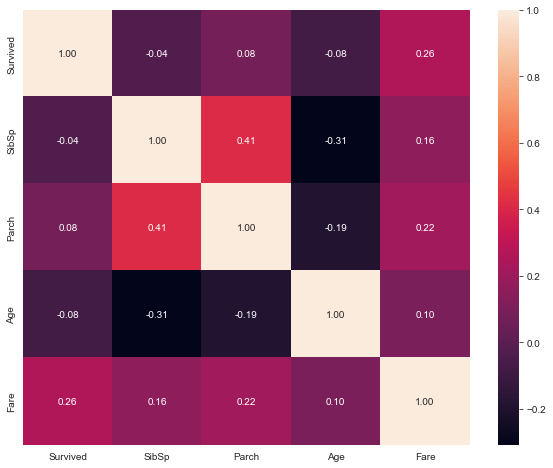

In [14]:
#Heatmap of numerical columns
plt.figure(figsize = (10, 8))
sns.heatmap(df1[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f")
plt.show()

### Observation
The Fare feature seems to have high correlation with the Survived column..

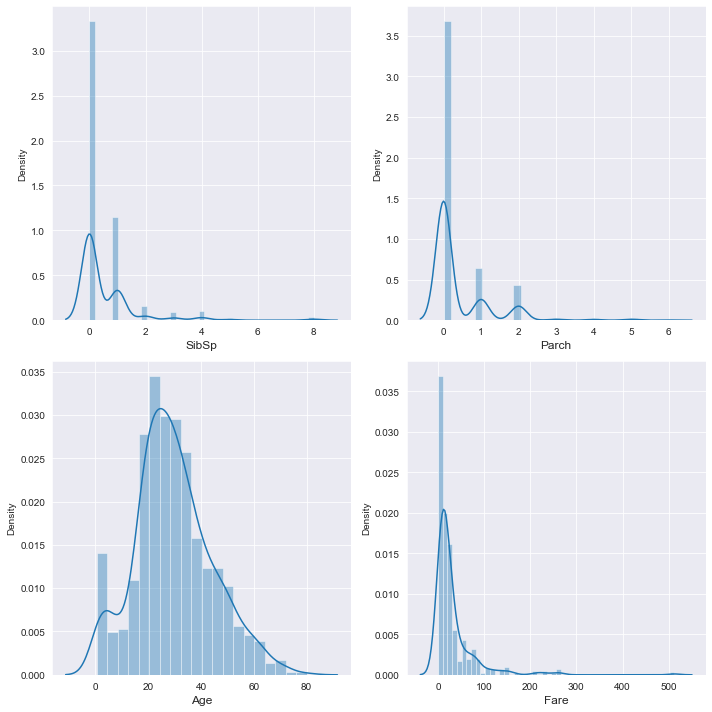

In [15]:
#distribution of numerical features.. 
i=0
plt.figure(figsize=(10,10))
for column in df1[["SibSp","Parch","Age","Fare"]].columns:
    plt.subplot(2,2,i+1)
    sns.distplot(df1[column])
    plt.xlabel(column,fontsize=12)
    i+=1
    
plt.tight_layout()

### Observation
1. SibSp & Parch are having Discrete values. & it seems there were more passangers with no siblings/spouse & no parents/children.
2. Age seems to be normally distributed. the null values are yet to be filled.
3. Fare seems to be right skewed also it has outliers with high fare price..

<h2><font color = "blue">08. Checking for 'SibSP' feature...</font></h2>

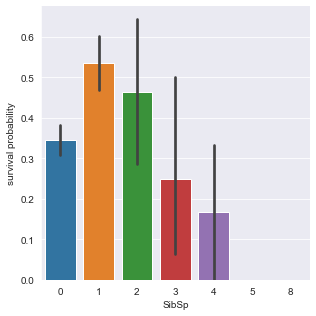

In [16]:
# Explore SibSp feature vs Survived
g = sns.factorplot(x="SibSp", y="Survived", data=df1, kind="bar", size = 4.5)
g = g.set_ylabels("survival probability")

### Observation
It seems that passengers having a lot of siblings/spouses have less chance to survive

Single passengers (0 SibSP) or with two other persons (SibSP 1 or 2) have more chance to survive

<h2><font color = "blue">09. Checking for 'Parch' feature...</font></h2>

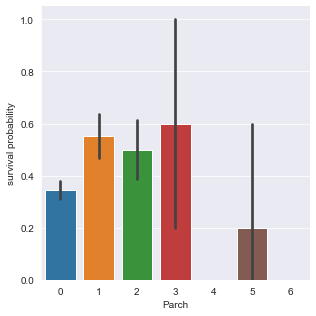

In [17]:
# Explore Parch feature vs Survived
g  = sns.factorplot(x="Parch", y="Survived", data=df1, kind="bar", size = 4.5)
g = g.set_ylabels("survival probability")

### Observation
Small families(Parch 1,2,3) have more chance to survive, more than single (Parch 0), medium (Parch 4) and large families (Parch 5,6 ).

<h2><font color = "blue">10. Checking for 'Age' feature...</font></h2>

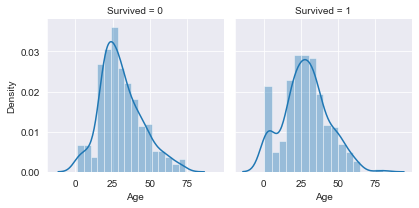

In [18]:
# Explore Age vs Survived
sns.FacetGrid(df1, col='Survived').map(sns.distplot, "Age")

### Observation:
Age distribution seems to be a gaussian distribution & NO outliers.

We notice that age distributions are not the same in the survived and not survived subpopulations. Indeed, there is a peak corresponding to young passengers, that have survived. We also see that passengers between 60-80 have less survived.

So, even if "Age" is not correlated with "Survived", we can see that there is age categories of passengers that of have more or less chance to survive.

It seems that very young passengers have more chance to survive.

<h2><font color = "blue">11. Checking for 'Fare' feature distribution...</font></h2>

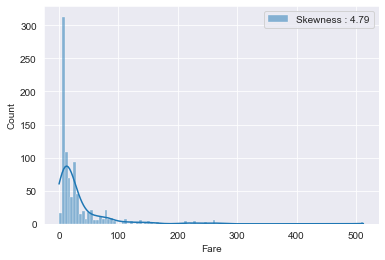

In [19]:
# to check distribution
sns.histplot(df1["Fare"],kde=True, label="Skewness : %.2f"%(df1["Fare"].skew())).legend(loc="best")

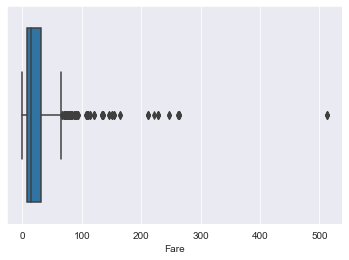

In [20]:
# to check outliers
sns.boxplot(df1["Fare"]);

### Observation: 
fare has Right-skewness(Positive) with 4.79 skewness value & it has outliers also.

<h2 align="center"><font color = "red">2. EDA : Categorical Feature Analysis...</font> </h2>

<h2><font color = "blue">12. Checking for 'Sex' feature...</font></h2>

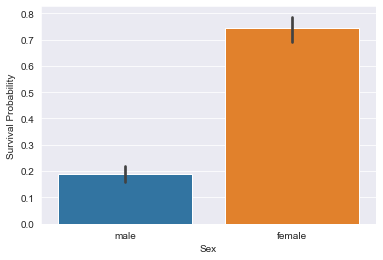

In [21]:
g = sns.barplot(x="Sex",y="Survived",data=df1).set_ylabel("Survival Probability")

### Observation:
It is clearly obvious that Male have less chance to survive than Female.

So Sex, might play an important role in the prediction of the survival.

<h2><font color = "blue">13. Checking for 'PClass' feature...</font></h2>

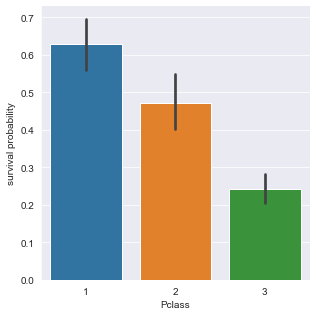

In [22]:
# Explore Pclass vs Survived
g = sns.factorplot(x="Pclass", y="Survived", data=df1, kind="bar", size = 4.5)
g = g.set_ylabels("survival probability")

### Observation:
The passenger survival is not the same in the 3 classes.

First class passengers have more chance to survive than second class and third class passengers.

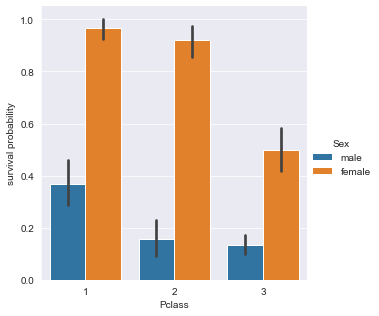

In [23]:
# Explore Pclass vs Survived by Sex
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=df1, size=4.5, kind="bar")
g = g.set_ylabels("survival probability")

### Observation:

Females in the first & Second Class have about 90% chances to survive.

Males in the first Class have more chances to survive than the other two classes.

<h2><font color = "blue">14. Checking for 'Embarked' feature...</font></h2>

In [24]:
df1["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
df1["Embarked"].isnull().sum()

2

In [26]:
#Fill Embarked nan values of dataset set with 'S' most frequent value
df1["Embarked"] = df1["Embarked"].fillna("S")

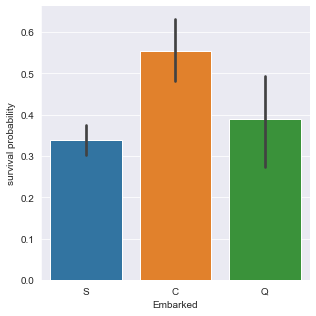

In [27]:
# Explore Embarked vs Survived 
g = sns.factorplot(x="Embarked", y="Survived", data=df1, size=4.5, kind="bar")
g = g.set_ylabels("survival probability")

### Observation:
It seems that passenger embarking from 'C' have more chance to survive.

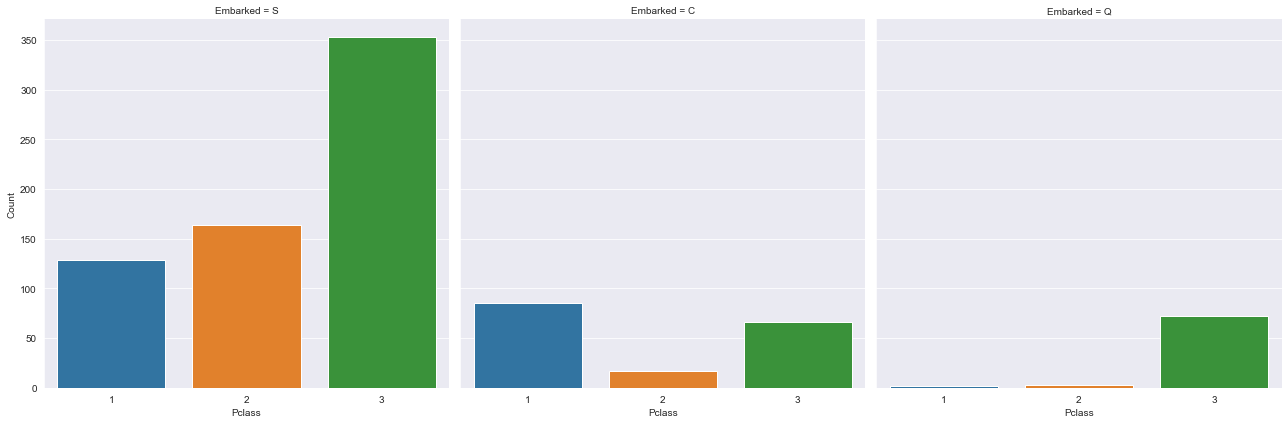

In [28]:
# Explore Pclass vs Embarked 
g = sns.factorplot("Pclass", col="Embarked", data=df1, size=6, kind="count")
g = g.set_ylabels("Count")

### Observation :
1. Most of the First class passengers have embarked from S & C.
2. Most of the Second & Third class passengers have embarked from S.
3. It seems those who were embarked from Q are mostly third class passengers.

<h2><font color = "blue">15. Understanging Age relation with Sex, Parch , Pclass and SibSP columns(to fill NaN values)...</font></h2>

As we see, Age column contains 177 missing values in the whole dataset.

Since there is subpopulations that have more chance to survive (children for example), it is preferable to keep the age feature and to impute the missing values.

To adress this problem, i looked at the most correlated features with Age (Sex, Parch , Pclass and SibSP).

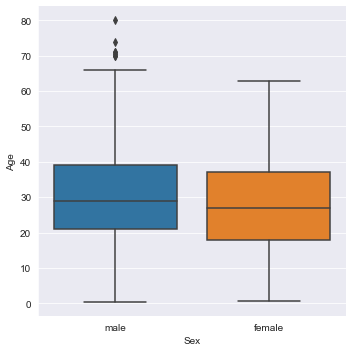

In [29]:
# Explore Age vs Sex
sns.factorplot(y="Age",x="Sex",data=df1,kind="box");

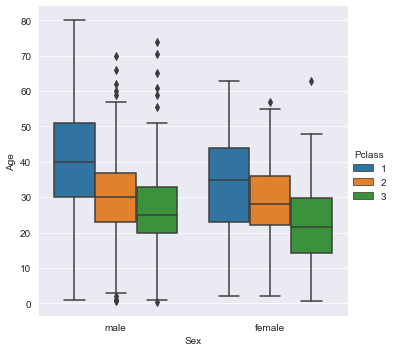

In [30]:
# Explore Age vs Sex, Pclass
sns.factorplot(y="Age",x="Sex",hue="Pclass", data=df1,kind="box");

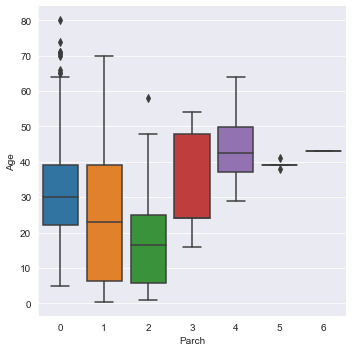

In [31]:
# Explore Age vs Parch
sns.factorplot(y="Age",x="Parch", data=df1,kind="box");

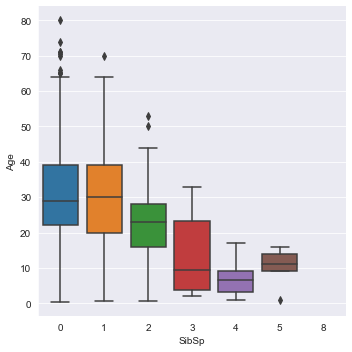

In [32]:
# Explore Age vs SibSP
sns.factorplot(y="Age",x="SibSp", data=df1,kind="box");

### Observation:
Age distribution seems to be the same in Male and Female subpopulations, so Sex is not informative to predict Age.

However, 1st class passengers are older than 2nd class passengers who are also older than 3rd class passengers.

the more a passenger has parents/children the older he is and the more a passenger has siblings/spouses the younger he is.

<h2><font color = "blue">16. Converting Sex category in to 0 & 1...</font>
<h3>Encoding 'Sex' category in to 0 & 1...</h3><h2>

In [33]:
# convert Sex into categorical value 0 for male and 1 for female
df2 = df1.copy()
df2["Sex"] = df2["Sex"].map({"male": 0, "female":1})

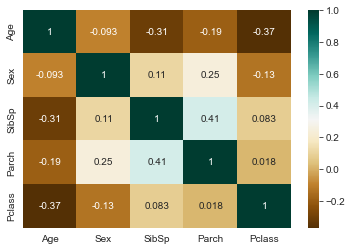

In [34]:
sns.heatmap(df2[["Age","Sex","SibSp","Parch","Pclass"]].corr(),cmap="BrBG",annot=True);

### Observation :
The correlation map confirms the factorplots observations except for Parch.

Age is not correlated with Sex, but is negatively correlated with Pclass, Parch and SibSp.

In the plot of Age in function of Parch, Age is growing with the number of parents / children. But the general correlation is negative.

So, i decided to use SibSP, Parch and Pclass in order to impute the missing ages.

The strategy is to fill Age with the median age of similar rows according to Pclass, Parch and SibSp.

In [35]:
# df3 = pd.DataFrame(df2, index)
df3 = df2.copy()
df3.reset_index(inplace = True)
df3.drop('index', axis=1, inplace = True)
df3.sample(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
47,48,1,3,"O'Driscoll, Miss. Bridget",1,NaN,0,0,14311,7.7500,Q
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",1,2.0,4,2,347082,31.2750,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",1,9.0,2,2,W./C. 6608,34.3750,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",1,NaN,0,0,PC 17585,79.2000,C
593,594,0,3,"Bourke, Miss. Mary",1,NaN,0,2,364848,7.7500,Q
83,84,0,1,"Carrau, Mr. Francisco M",0,28.0,0,0,113059,47.1000,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,CA. 2343,69.5500,S
527,528,0,1,"Farthing, Mr. John",0,NaN,0,0,PC 17483,221.7792,S


<h2><font color = "blue">17. Filling missing Values in Age Column...</font>

In [36]:
# Filling missing value of Age 

## Fill Age with the median age of similar rows according to Pclass, Parch and SibSp

# Index of NaN age rows
index_NaN_age = list(df3["Age"][df3["Age"].isnull()].index)
# print(index_NaN_age)

for i in index_NaN_age:
    age_med = df3["Age"].median()
    age_pred = df3["Age"][(df3['SibSp'] == df3.iloc[i]["SibSp"]) & 
                           (df3['Parch'] == df3.iloc[i]["Parch"]) & 
                           (df3['Pclass'] == df3.iloc[i]["Pclass"])
                         ].median()
#     print(i)
    if not np.isnan(age_pred):
        df3['Age'].iloc[i] = age_pred
    else :
        df3['Age'].iloc[i] = age_med

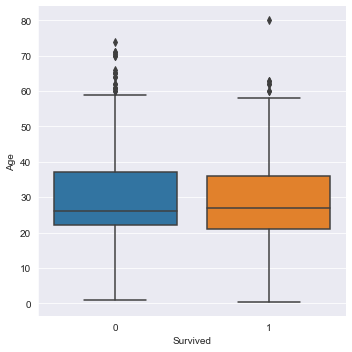

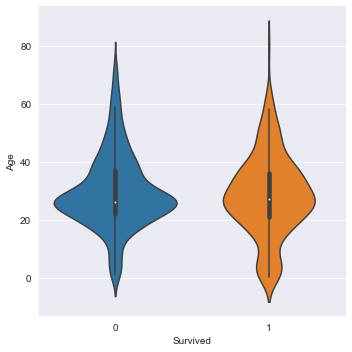

In [37]:
sns.factorplot(x="Survived", y = "Age",data = df3, kind="box")
sns.factorplot(x="Survived", y = "Age",data = df3, kind="violin")

### Observation:
No difference between median value of age in survived and not survived subpopulation.

But in the violin plot of survived passengers, we still notice that very young passengers have higher survival rate.

<h2><font color = "blue">18. Removing outliers in 'Fare' column using Z-score method...</font>

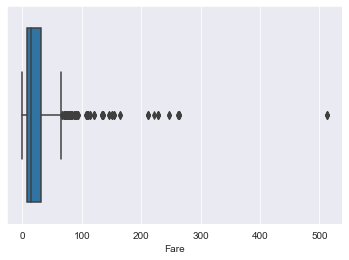

In [38]:
# to check outliers
sns.boxplot(df3["Fare"]);

In [39]:
df4 = df3.copy()

In [40]:
from scipy.stats import zscore
z = np.abs(zscore(df4['Fare']))
threshold = 3
rows_to_remove = np.where(z>3)[0].tolist()

In [41]:
# df4 = df4[df4['Fare'][z<3]]

df4.drop(rows_to_remove, inplace=True)

In [42]:
#Removing outliers & null values
# df4 = df3[(df3['Fare'] < 200) & (df3['Fare'] > 0)]

# total data after removing outliers & null values
df4.shape

(871, 11)

In [43]:
# % Data loss
data_loss = (df3.shape[0] - df4.shape[0])*100/df3.shape[0]
data_loss

2.244668911335578

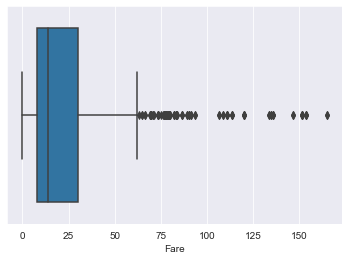

In [44]:
sns.boxplot(df4["Fare"]);

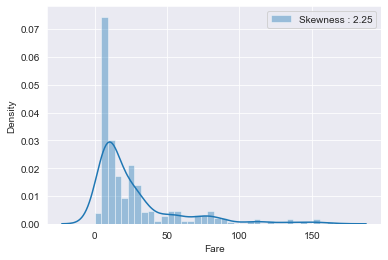

In [45]:
# to check distribution & skewness
sns.distplot(df4["Fare"], kde=True, label="Skewness : %.2f"%(df4["Fare"].skew())).legend(loc="best")

### Observation:
1. Outliers removed & because of this, skewness also reduced, but we can still reduce skewness applying BoxCox transformation to it.
2. Data Loss due to Fare Outlier removal :2.24%.

<h2><font color = "blue">19. Removing skewness in 'Fare' column...</font>

In [46]:
df5 = df4.copy()

In [47]:
df5.shape

(871, 11)

In [48]:
from scipy import stats

In [49]:
df5 = df5[df5['Fare'] > 0]

In [50]:
df5.shape

(856, 11)

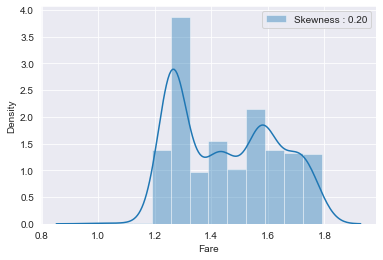

In [51]:
df5["Fare"] = stats.boxcox(df5['Fare'])[0]

# to check distribution & skewness
sns.distplot(df5["Fare"], kde=True, label="Skewness : %.2f"%(df5["Fare"].skew())).legend(loc="best")

### Observation:
Skewness is clearly reduced after the box-cox transformation.

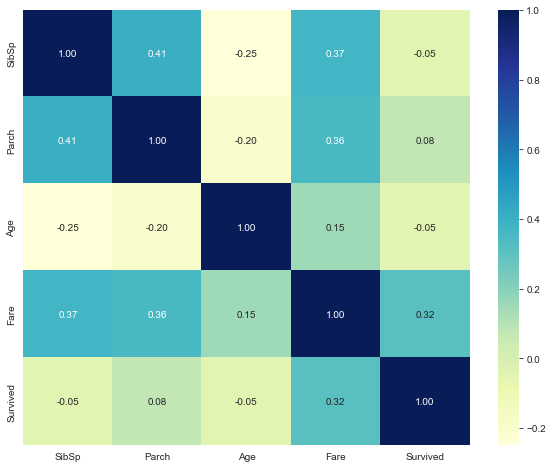

In [52]:
#Heatmap of numerical columns after removing outliers & skewness from 'Fare' column..
plt.figure(figsize = (10, 8))
sns.heatmap(df5[["SibSp","Parch","Age","Fare","Survived"]].corr(),annot=True, fmt = ".2f", cmap="YlGnBu")
plt.show()

### Observation:
from heat map it is evident that fare has important role in predicting survival of the passanges.

<h2 align="center"><font color = "red">3. Feature Engineering..</font> </h2>

<h2><font color = "blue">20. Feature Engineering using Name...</font></h2>

The Name feature contains information on passenger's title.

Since some passenger with distingused title may be preferred during the evacuation, it is interesting to add them to the model.

In [53]:
df5["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [54]:
# Get Title from Name
df5_title = [i.split(",")[1].split(".")[0].strip() for i in df5["Name"]]
df5["Title"] = df5_title
df5["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [55]:
df5["Title"].tail()

886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, dtype: object

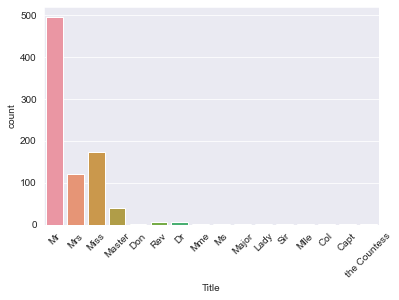

In [56]:
g = sns.countplot(x="Title",data=df5)
g = plt.setp(g.get_xticklabels(), rotation=45)

#### Observation:
There is 16 titles in the dataset, most of them are very rare and we can group them in 4 categories.

In [57]:
# Convert to categorical values Title 
df5["Title"] = df5["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir'], 'Other')
df5["Title"] = df5["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Other":3})
df5["Title"] = df5["Title"].astype(int)
df5["Title"].unique()

array([2, 1, 0, 3])

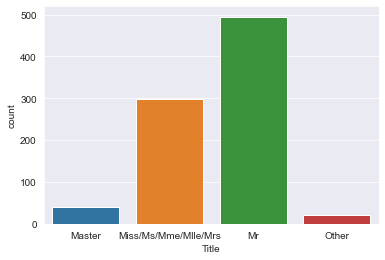

In [58]:
#Plotting of names salutaion counts
g = sns.countplot(df5["Title"])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Other"])

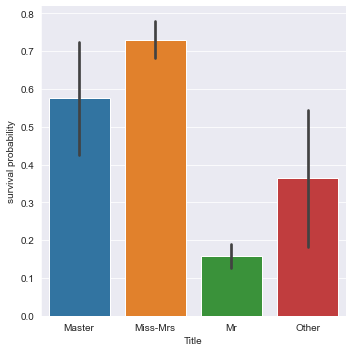

In [59]:
#Plotting of names salutaion survival probabilty
g = sns.factorplot(x="Title",y="Survived",data=df5,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Other"])
g = g.set_ylabels("survival probability")

### Observation :
1. "Women and children first"

2. Passengers with rare title have more chance to survive.

In [60]:
#Dropping name after feature transformation
df5.drop('Name', axis = 1, inplace = True)
df5

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,1.237441,S,2
1,2,1,1,1,38.0,1,0,PC 17599,1.715901,C,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,1.268545,S,1
3,4,1,1,1,35.0,1,0,113803,1.681176,S,1
4,5,0,3,0,35.0,0,0,373450,1.273866,S,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,1.417548,S,3
887,888,1,1,1,19.0,0,0,112053,1.596659,S,1
888,889,0,3,1,13.5,1,2,W./C. 6607,1.551714,S,1
889,890,1,1,0,26.0,0,0,111369,1.596659,C,2


<h2><font color = "blue">21. Feature Engineering using 'SibSp' & 'Parch' features</font></h2>

### Family size
We can imagine that large families will have more difficulties to evacuate, looking for theirs sisters/brothers/parents during the evacuation. So, i choosed to create a "Fize" (family size) feature which is the sum of SibSp , Parch and 1 (including the passenger).

In [61]:
df6 = df5.copy()

In [62]:
# Create a family size descriptor from SibSp and Parch
df6["Fsize"] = df6["SibSp"] + df6["Parch"] + 1

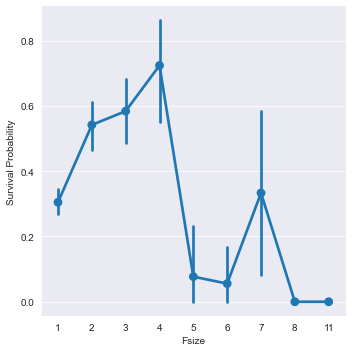

In [63]:
#plotting survival probabilty for each category of family size
sns.factorplot(x="Fsize",y="Survived",data = df6).set_ylabels("Survival Probability")

### Observation :
The family size seems to play an important role, survival probability is worst for large families.

Additionally, i decided to created 4 categories of family size.

In [64]:
# Create new feature of family size
df6['Single'] = df6['Fsize'].map(lambda s: 1 if s == 1 else 0)
df6['SmallF'] = df6['Fsize'].map(lambda s: 1 if  s == 2  else 0)
df6['MedF'] = df6['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
df6['LargeF'] = df6['Fsize'].map(lambda s: 1 if s >= 5 else 0)

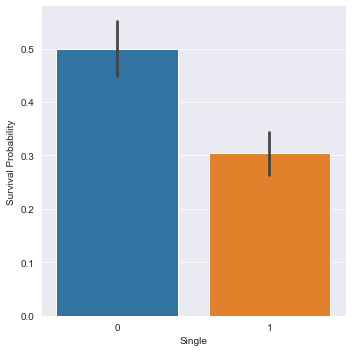

In [65]:
#Survival probability for single passenger travelling
sns.factorplot(x="Single",y="Survived",data=df6,kind="bar").set_ylabels("Survival Probability")

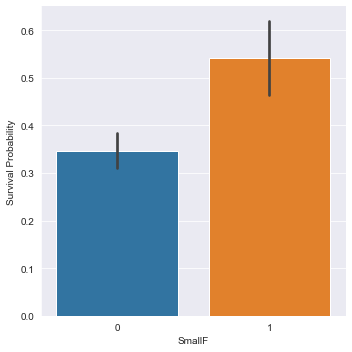

In [66]:
#Survival probability for small family with 2 passenger travelling
sns.factorplot(x="SmallF",y="Survived",data=df6,kind="bar").set_ylabels("Survival Probability")

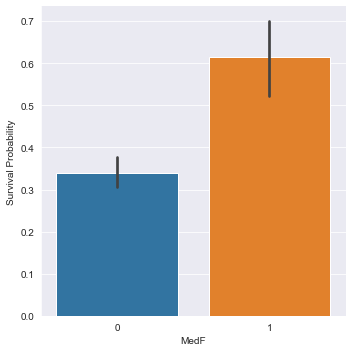

In [67]:
#Survival probability for medium family with 3-4 passenger travelling
sns.factorplot(x="MedF",y="Survived",data=df6,kind="bar").set_ylabels("Survival Probability")

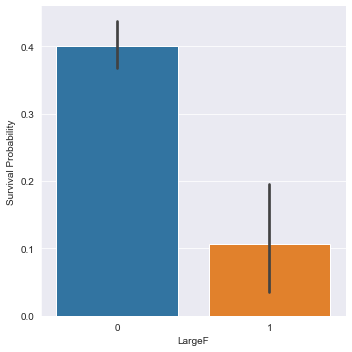

In [68]:
#Survival probability for large family with 5 or more passenger travelling
sns.factorplot(x="LargeF",y="Survived",data=df6,kind="bar").set_ylabels("Survival Probability")

### Observation:
Factorplots of family size categories show that Small and Medium families have more chance to survive than single passenger and large families.

In [69]:
df6.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fsize,Single,SmallF,MedF,LargeF
0,1,0,3,0,22.0,1,0,A/5 21171,1.237441,S,2,2,0,1,0,0
1,2,1,1,1,38.0,1,0,PC 17599,1.715901,C,1,2,0,1,0,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,1.268545,S,1,1,1,0,0,0
3,4,1,1,1,35.0,1,0,113803,1.681176,S,1,2,0,1,0,0
4,5,0,3,0,35.0,0,0,373450,1.273866,S,2,1,1,0,0,0


<h2><font color = "blue">22. Encoding other categorical data using get_dummies...</font></h2>

In [70]:
df7 = df6.copy()

In [71]:
# convert Title and Embarked to numerical values
df7 = pd.get_dummies(df7, columns = ["Title"])
df7 = pd.get_dummies(df7, columns = ["Embarked"], prefix="Em")

In [72]:
df7.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Fsize,...,SmallF,MedF,LargeF,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
0,1,0,3,0,22.0,1,0,A/5 21171,1.237441,2,...,1,0,0,0,0,1,0,0,0,1
1,2,1,1,1,38.0,1,0,PC 17599,1.715901,2,...,1,0,0,0,1,0,0,1,0,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,1.268545,1,...,0,0,0,0,1,0,0,0,0,1
3,4,1,1,1,35.0,1,0,113803,1.681176,2,...,1,0,0,0,1,0,0,0,0,1
4,5,0,3,0,35.0,0,0,373450,1.273866,1,...,0,0,0,0,0,1,0,0,0,1
5,6,0,3,0,26.0,0,0,330877,1.290407,1,...,0,0,0,0,0,1,0,0,1,0
6,7,0,1,0,54.0,0,0,17463,1.678159,1,...,0,0,0,0,0,1,0,0,0,1
7,8,0,3,0,2.0,3,1,349909,1.530372,5,...,0,0,1,1,0,0,0,0,0,1
8,9,1,3,1,27.0,0,2,347742,1.374928,3,...,0,1,0,0,1,0,0,0,0,1
9,10,1,2,1,14.0,1,0,237736,1.597062,2,...,1,0,0,0,1,0,0,1,0,0


In [73]:
# Convert Pclass category in to dummy variables/features
df7["Pclass"] = df7["Pclass"].astype("category")
df7 = pd.get_dummies(df7, columns = ["Pclass"],prefix="Pc")

<h2><font color = "blue">23. Dropping irrelevant feature...</font></h2>

In [74]:
df7.dtypes

PassengerId      int64
Survived         int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Fsize            int64
Single           int64
SmallF           int64
MedF             int64
LargeF           int64
Title_0          uint8
Title_1          uint8
Title_2          uint8
Title_3          uint8
Em_C             uint8
Em_Q             uint8
Em_S             uint8
Pc_1             uint8
Pc_2             uint8
Pc_3             uint8
dtype: object

In [75]:
# Drop Ticket variable As we dont see any use of ticket & we have Pclass & fare to differentiate between passengers
df7.drop(labels = ["Ticket"], axis = 1, inplace = True)

In [76]:
df7.dtypes

PassengerId      int64
Survived         int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Fsize            int64
Single           int64
SmallF           int64
MedF             int64
LargeF           int64
Title_0          uint8
Title_1          uint8
Title_2          uint8
Title_3          uint8
Em_C             uint8
Em_Q             uint8
Em_S             uint8
Pc_1             uint8
Pc_2             uint8
Pc_3             uint8
dtype: object

<AxesSubplot:>

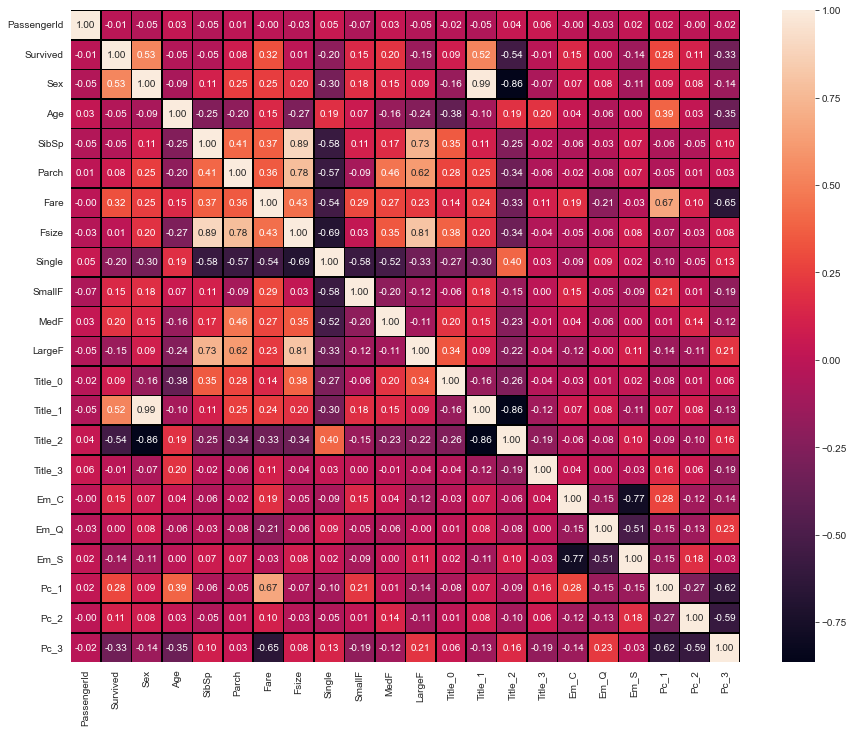

In [77]:
plt.figure(figsize = (15, 12))
sns.heatmap(df7.corr(), annot =True, linewidth=0.5, linecolor='black', fmt = '.2f')

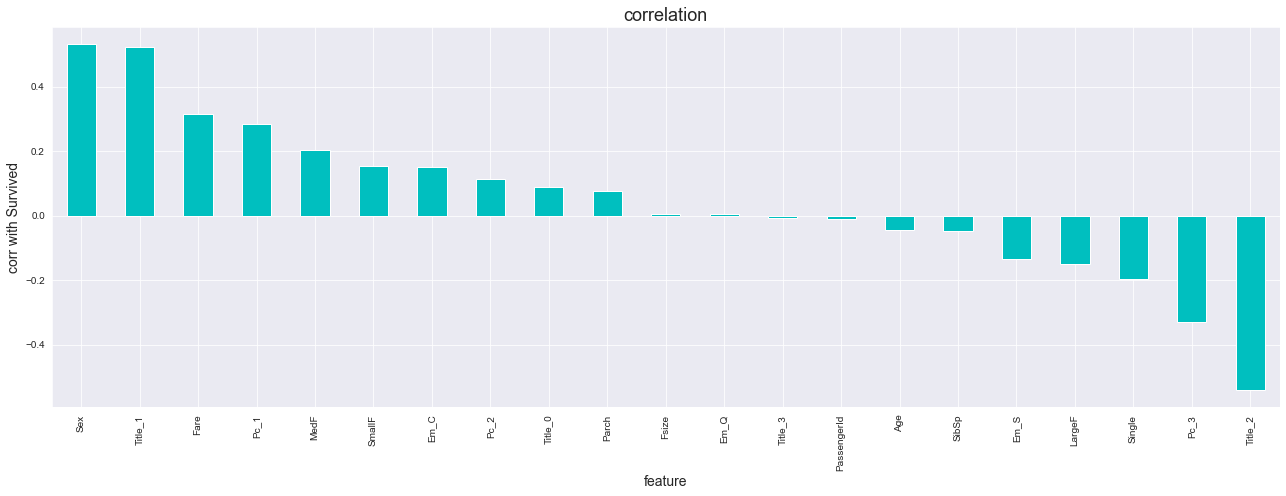

In [78]:
plt.figure(figsize = (22,7))
df7.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind = 'bar', color = 'c')
plt.xlabel('feature', fontsize=14)
plt.ylabel('corr with Survived', fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

In [79]:
df7.corr()['Survived'].sort_values()

Title_2       -0.540890
Pc_3          -0.330331
Single        -0.195147
LargeF        -0.149673
Em_S          -0.135004
SibSp         -0.046180
Age           -0.045468
PassengerId   -0.009065
Title_3       -0.006142
Em_Q           0.004918
Fsize          0.005763
Parch          0.075812
Title_0        0.087941
Pc_2           0.112578
Em_C           0.152008
SmallF         0.154774
MedF           0.203250
Pc_1           0.283179
Fare           0.315370
Title_1        0.523383
Sex            0.531513
Survived       1.000000
Name: Survived, dtype: float64

### Observation: Outcome of Correlation:
From Correlation data, We Observed,
1. Title_2, Pc_3, Single, largeF & Em_s showing negative correlattion, & Title_2 is having most negative correlation with Survived Column.


2. Sex, Title_1, Fare, Pc_1, MedF, SmallF, Em_c, & Pc_2 showing positive correlattion, & Sex is having most Positive correlation with Survived Column.


3. PassengerId, Title_3, Em_Q & Fsize show no correlation at all

In [80]:
# Drop PassengerId, Title_3, Em_Q & Fsize variable
df7.drop(labels = ["PassengerId", 'Title_3', 'Em_Q', 'Fsize'], axis = 1, inplace = True)

In [81]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df7.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Single,SmallF,MedF,LargeF,Title_0,Title_1,Title_2,Em_C,Em_S,Pc_1,Pc_2,Pc_3
0,0,0,22.0,1,0,1.237441,0,1,0,0,0,0,1,0,1,0,0,1
1,1,1,38.0,1,0,1.715901,0,1,0,0,0,1,0,1,0,1,0,0
2,1,1,26.0,0,0,1.268545,1,0,0,0,0,1,0,0,1,0,0,1
3,1,1,35.0,1,0,1.681176,0,1,0,0,0,1,0,0,1,1,0,0
4,0,0,35.0,0,0,1.273866,1,0,0,0,0,0,1,0,1,0,0,1


In [82]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 0 to 890
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  856 non-null    int64  
 1   Sex       856 non-null    int64  
 2   Age       856 non-null    float64
 3   SibSp     856 non-null    int64  
 4   Parch     856 non-null    int64  
 5   Fare      856 non-null    float64
 6   Single    856 non-null    int64  
 7   SmallF    856 non-null    int64  
 8   MedF      856 non-null    int64  
 9   LargeF    856 non-null    int64  
 10  Title_0   856 non-null    uint8  
 11  Title_1   856 non-null    uint8  
 12  Title_2   856 non-null    uint8  
 13  Em_C      856 non-null    uint8  
 14  Em_S      856 non-null    uint8  
 15  Pc_1      856 non-null    uint8  
 16  Pc_2      856 non-null    uint8  
 17  Pc_3      856 non-null    uint8  
dtypes: float64(2), int64(8), uint8(8)
memory usage: 120.2 KB


### Observation:
We have dropped Ticket, Passenger ID Title_3, Em_Q & Fsize column.

WE encoded Sex, Pclass, Name(using title), Embarked features.

We applied feature engineering on (Name) & (SibSp & Parch).

<h2><font color = "blue">24. Checking distribution & Outlier for cleaned data</font></h2>

In [83]:
df8 = df7.copy()

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Single'}>,
        <AxesSubplot:title={'center':'SmallF'}>,
        <AxesSubplot:title={'center':'MedF'}>,
        <AxesSubplot:title={'center':'LargeF'}>],
       [<AxesSubplot:title={'center':'Title_0'}>,
        <AxesSubplot:title={'center':'Title_1'}>,
        <AxesSubplot:title={'center':'Title_2'}>,
        <AxesSubplot:title={'center':'Em_C'}>,
        <AxesSubplot:title={'center':'Em_S'}>],
       [<AxesSubplot:title={'center':'Pc_1'}>,
        <AxesSubplot:title={'center':'Pc_2'}>,
        <AxesSubplot:title={'center':'Pc_3'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplo

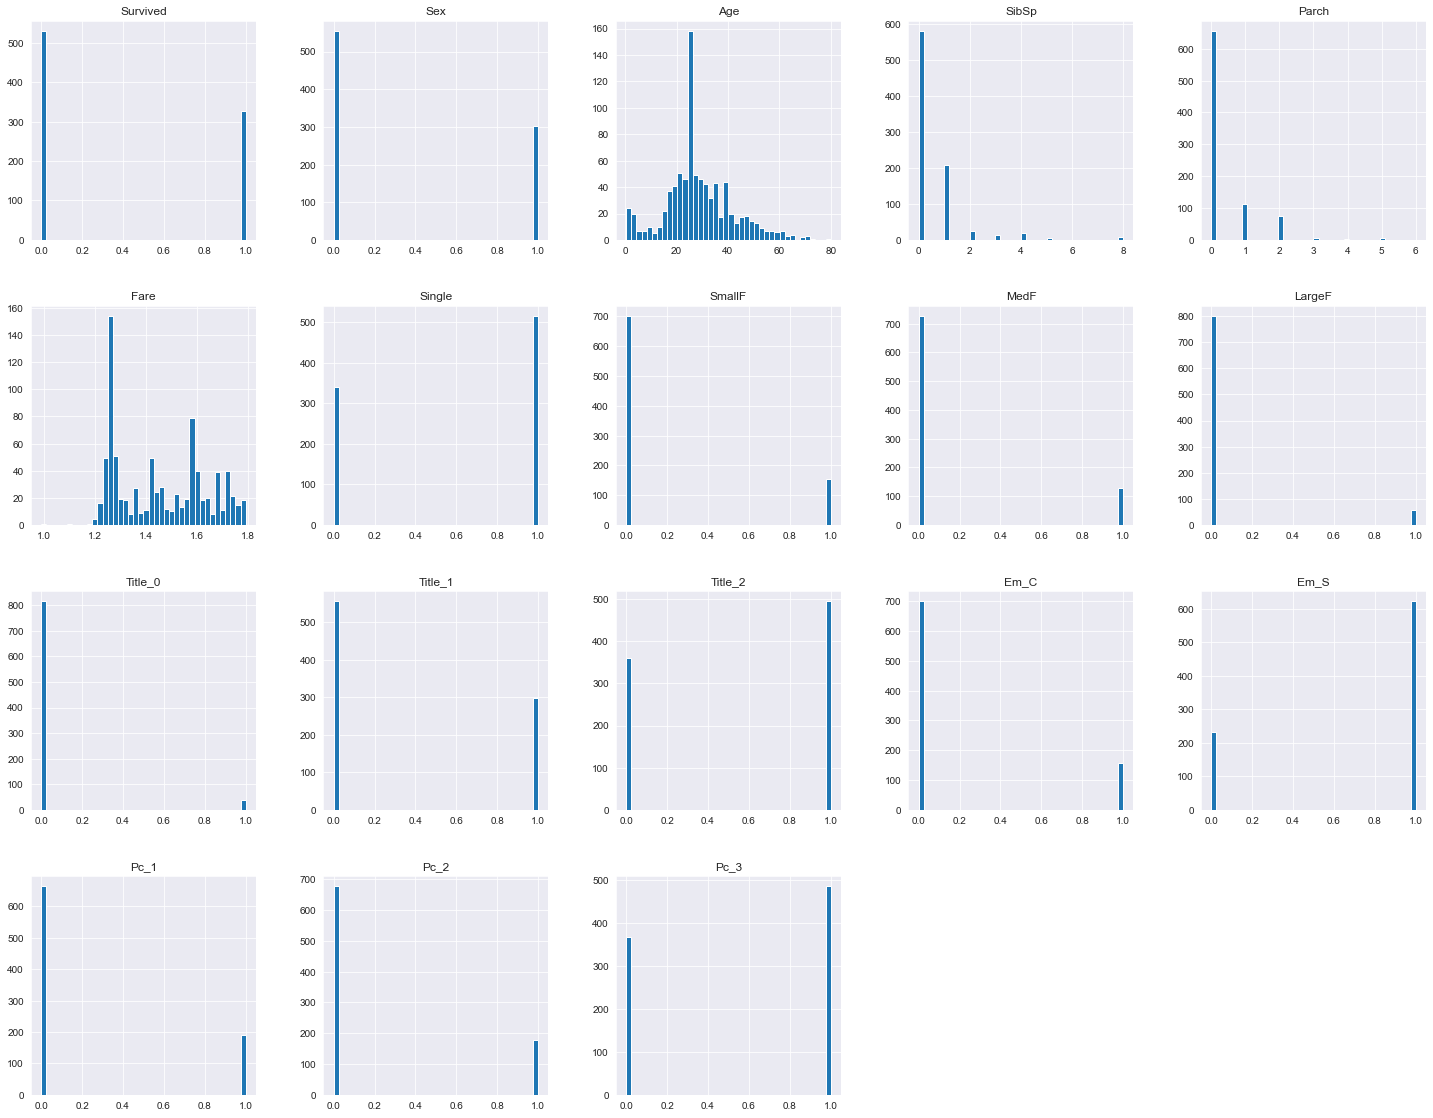

In [84]:
df8.hist(figsize=(25,25), layout=(5, 5), bins = 40)

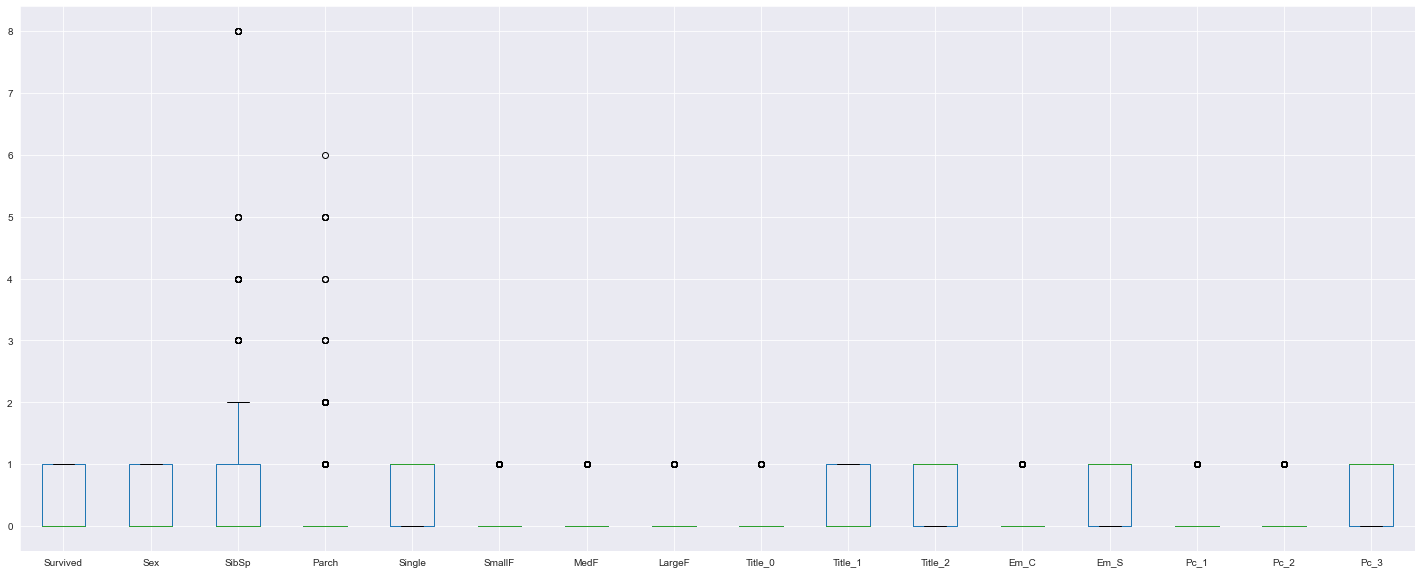

In [85]:
df8.drop(['Age', 'Fare'], axis=1).boxplot(figsize = [25,12])
plt.subplots_adjust(bottom = 0.25)
plt.show()

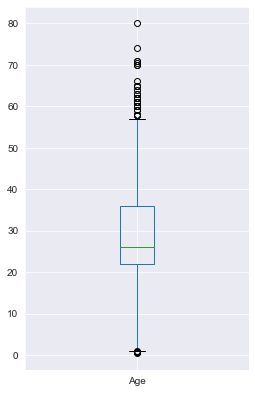

In [89]:
df8[['Age']].boxplot(figsize = [4,8])
plt.subplots_adjust(bottom = 0.25)
plt.show()

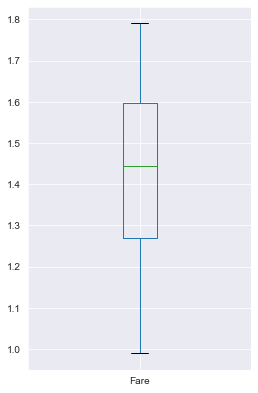

In [90]:
df8[['Fare']].boxplot(figsize = [4,8])
plt.subplots_adjust(bottom = 0.25)
plt.show()

### Observation:
1. SibSp, Parch are categorical data. they should not be considered for outlier removal.
2. Only Fare & Age are the continuous data.
3. Rest all are Categorical data.

<AxesSubplot:>

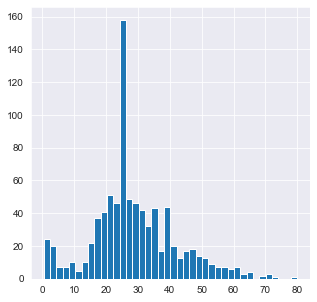

In [93]:
df8['Age'].hist(figsize=(5,5), bins=40)

### To make Age columns normally distributed we will use Z score method to remove outliers...

In [94]:
z = np.abs(zscore(df8['Age']))
threshold = 3
rows_to_remove = np.where(z>3)[0].tolist()

df8.drop(rows_to_remove, inplace=True)

data_loss_age_remove = (df7.shape[0] - df8.shape[0])*100/df7.shape[0]
# % Data loss
total_data_loss = (df3.shape[0] - df8.shape[0])*100/df3.shape[0]
# total_data_loss

print('Total Data loss after Fare & age Outliers : ', round(total_data_loss,2))

Total Data loss after Fare & age Outliers :  4.71


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Single'}>,
        <AxesSubplot:title={'center':'SmallF'}>,
        <AxesSubplot:title={'center':'MedF'}>,
        <AxesSubplot:title={'center':'LargeF'}>],
       [<AxesSubplot:title={'center':'Title_0'}>,
        <AxesSubplot:title={'center':'Title_1'}>,
        <AxesSubplot:title={'center':'Title_2'}>,
        <AxesSubplot:title={'center':'Em_C'}>,
        <AxesSubplot:title={'center':'Em_S'}>],
       [<AxesSubplot:title={'center':'Pc_1'}>,
        <AxesSubplot:title={'center':'Pc_2'}>,
        <AxesSubplot:title={'center':'Pc_3'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplo

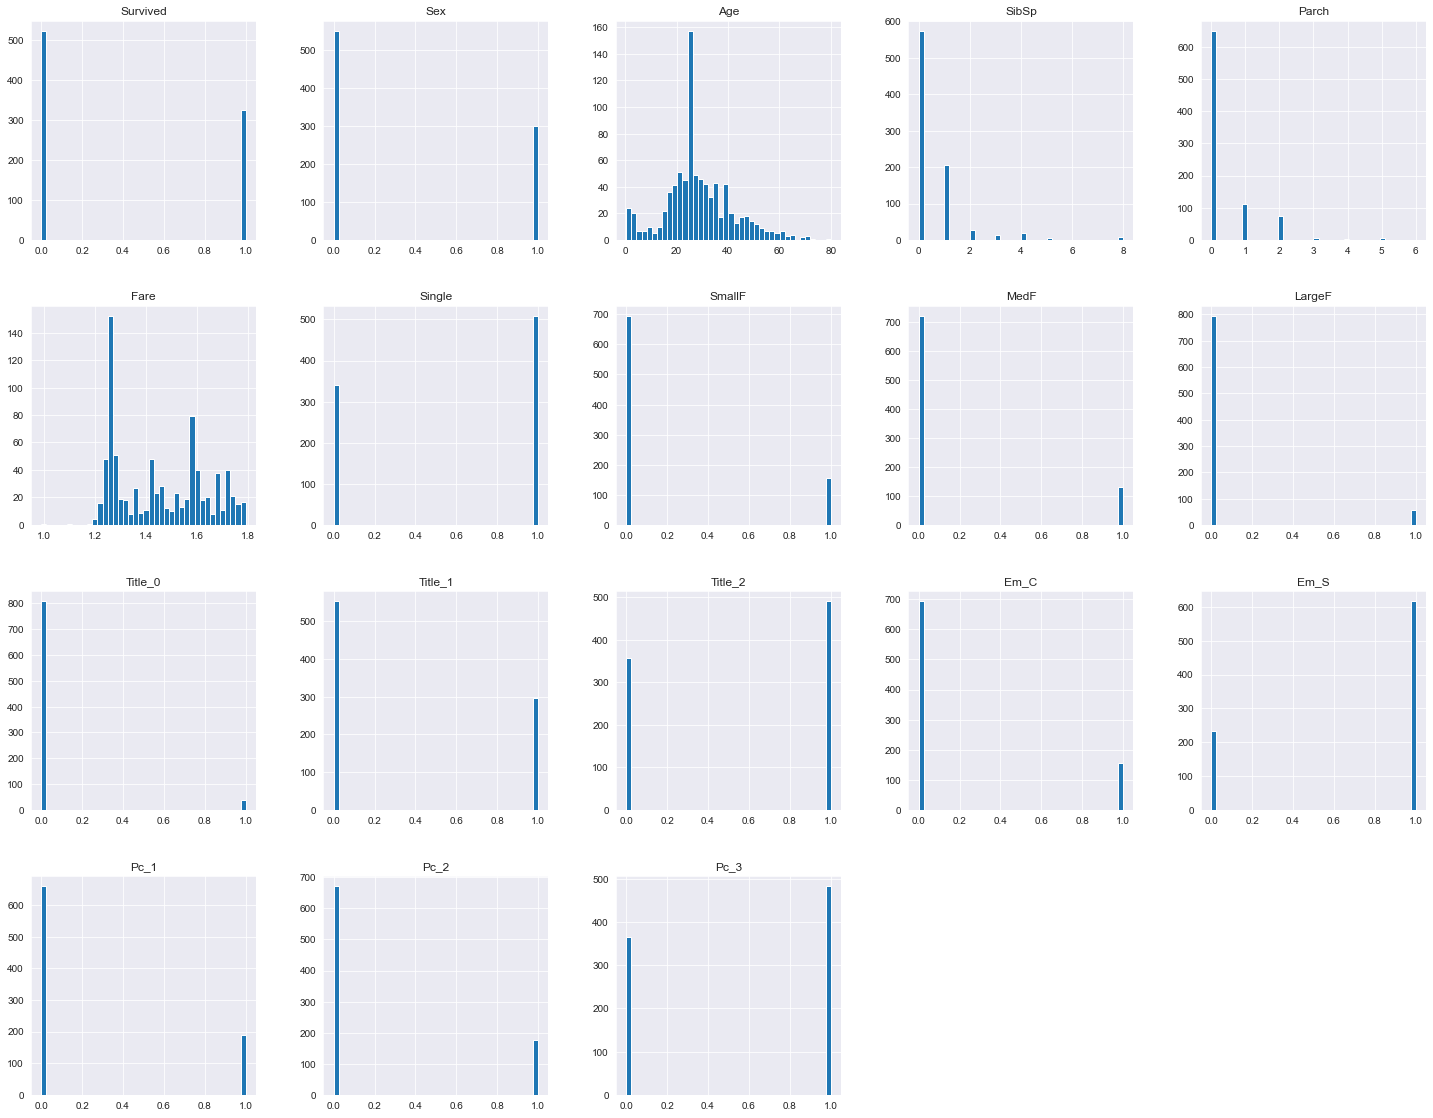

In [95]:
df8.hist(figsize=(25,25), layout=(5, 5), bins = 40)

In [96]:
#Shape after Age Outliers removal
df8.shape

(849, 18)

### Observation:
1. Outliers removed but distribution did not change
2. Total Data Loss due to Fare & Age Outlier removal :4.71%.

<h2><font color = "blue">25. Preparing data for ML model</font></h2>

In [98]:
x = df8.drop('Survived', axis = 1)
y = df8['Survived']

## Check for Data Imbalence..

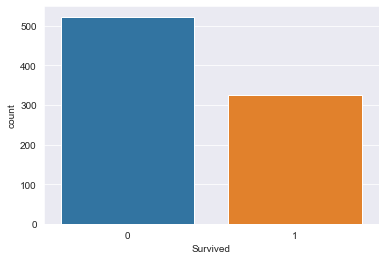

Counter({0: 523, 1: 326})

In [183]:
sns.countplot(x=y)
plt.show()
Counter(y)

In [1]:
round((326/523)*100, 1)

62.3

## Data is imbalanced. need to apply Imbalence technique(SMOTE).

In [100]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [101]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

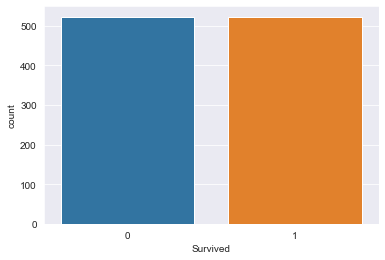

Counter({0: 523, 1: 523})

In [102]:
sns.countplot(x=y)
plt.show()
Counter(y)

### Observation:
After using oversampling method, data is balanced.

## Applying Standard Scaler to our dat

In [103]:
#Transforming data into Standard Norma Distribution
sc = StandardScaler()

In [104]:
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

## Since outcome has only two classes we will use binary classification model.

<h1 align="center"><font color = "red">Model Selection</font> </h1>

In [105]:
## TO PLOT CONFUSION MATRIX
def confusion_matrix_c(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("====================")
    print('Confusion Matrix :\n')
    print(cm)
    print('\n')
    print("====================")
    
    
## TO PLOT ROC_AUC CURVE
def plot_roc_auc_curve(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    


# TO print classification report, confusion matrx, roc-auc curve
def print_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print(f"accuracy score for train : {accuracy_score(y_train,y_pred) * 100:.2f}%")
              
    elif train==False:
        y_pred = clf.predict(x_test)
        acc = round(accuracy_score(y_test,y_pred)*100,2)
        print("accuracy score for test :", acc)
        confusion_matrix_c(y_test, y_pred)
        print('\n \n Test Classification report \n', classification_report(y_test, y_pred, digits=2))
        
        diff = []
        best_cv = []
        for j in range(3, 12):
            cv_score = round(cross_val_score(clf, x, y, cv=j, scoring="accuracy").mean()*100,2)
            diff.append(abs(cv_score - acc))
            best_cv.append(j)
        k_f = best_cv[diff.index(min(diff))]
        cv_score = cross_val_score(clf, x, y, cv=k_f, scoring="accuracy").mean()
        print(f"Cross Validation score at best cv={k_f} is : {cv_score*100:.2f}%")
        y_predict_probabilities = clf.predict_proba(x_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
        roc_auc = auc(fpr, tpr)
        plot_roc_auc_curve(fpr, tpr)

<h2 align = 'center'><font color = "blue">Checking for Logistic Regression algorithm..</font></h2>

In [115]:
lr = LogisticRegression()
train = []
test = []
diff = []
randomstate = []
for i in range(0, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    if round(accuracy_score(y_train, pred_train)*100,1)==round(accuracy_score(y_test, pred_test)*100,1):
        train.append(accuracy_score(y_train, pred_train))
        test.append(accuracy_score(y_test, pred_test))
        diff.append(accuracy_score(y_train, pred_train) - accuracy_score(y_test, pred_test))
        randomstate.append(i)
    
table = pd.DataFrame(list(zip(randomstate, train, test, diff)),
                              columns =['randomstate', 'train_score', 'test_score', 'score_diff'],
                              index=pd.RangeIndex(start=1, stop=(len(randomstate)+1), name='Sr. No.'))

# table.sort_values(by=['score_diff', 'train_score', 'test_score']).head(10)

In [116]:
table[(-0.01 < table['score_diff']) & (table['score_diff'] < 0.01)].sort_values(by=['score_diff', 'train_score', 'test_score'])

,randomstate,train_score,test_score,score_diff
Sr. No.,,,,
1,39,0.832536,0.833333,-0.000797
2,50,0.832536,0.833333,-0.000797
13,892,0.832536,0.833333,-0.000797
14,909,0.832536,0.833333,-0.000797
3,57,0.828947,0.828571,0.000376
4,122,0.828947,0.828571,0.000376
5,174,0.828947,0.828571,0.000376
6,178,0.828947,0.828571,0.000376
7,276,0.828947,0.828571,0.000376


## Splitting the datframe..

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 57)

## Training & evaluating model..

accuracy score for train : 82.89%
accuracy score for test : 82.86
Confusion Matrix :

[[88 17]
 [19 86]]



 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.83      0.82      0.83       105

    accuracy                           0.83       210
   macro avg       0.83      0.83      0.83       210
weighted avg       0.83      0.83      0.83       210

Cross Validation score at best cv=8 is : 82.89%


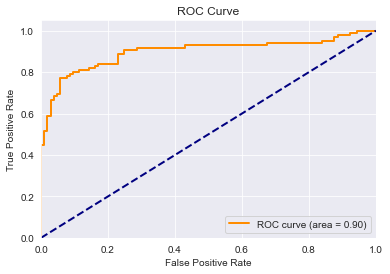

In [118]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print_score(lr, x_train, x_test, y_train, y_test, train=True)
print_score(lr, x_train, x_test, y_train, y_test, train=False)

<h2 align = 'center'><font color = "blue">Checking for DecisionTreeClassifier algorithm..</font></h2>

In [119]:
dt = DecisionTreeClassifier()
train = []
test = []
diff = []
randomstate = []
for i in range(0, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = i)
    dt.fit(x_train, y_train)
    pred_train = dt.predict(x_train)
    pred_test = dt.predict(x_test)
    
    if (round(accuracy_score(y_train, pred_train),1)>round(accuracy_score(y_test, pred_test),1)*1.02) | (round(accuracy_score(y_train, pred_train),1)<round(accuracy_score(y_test, pred_test),1)*0.98):
        train.append(accuracy_score(y_train, pred_train))
        test.append(accuracy_score(y_test, pred_test))
        diff.append(accuracy_score(y_train, pred_train) - accuracy_score(y_test, pred_test))
        randomstate.append(i)
    
table = pd.DataFrame(list(zip(randomstate, train, test, diff)),
                              columns =['randomstate', 'train_score', 'test_score', 'score_diff'],
                              index=pd.RangeIndex(start=1, stop=(len(randomstate)+1), name='Sr. No.'))

# table.sort_values(by=['score_diff', 'train_score', 'test_score']).head(10)

In [126]:
table[(-0.1 < table['score_diff']) & (table['score_diff'] < 0.1)].sort_values(by=['score_diff', 'train_score', 'test_score'])

,randomstate,train_score,test_score,score_diff
Sr. No.,,,,
973,972,0.982057,0.9,0.082057


## Splitting the datframe..

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 972)

## Training & evaluating model..

accuracy score for train : 98.21%
accuracy score for test : 89.52
Confusion Matrix :

[[ 87  12]
 [ 10 101]]



 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        99
           1       0.89      0.91      0.90       111

    accuracy                           0.90       210
   macro avg       0.90      0.89      0.89       210
weighted avg       0.90      0.90      0.90       210

Cross Validation score at best cv=10 is : 81.18%


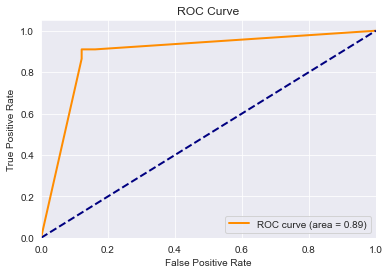

In [128]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print_score(dt, x_train, x_test, y_train, y_test, train=True)
print_score(dt, x_train, x_test, y_train, y_test, train=False)

<h2 align = 'center'><font color = "blue">Checking for RandomForestClassifier algorithm..</font></h2>

In [129]:
rf = RandomForestClassifier()
train = []
test = []
diff = []
randomstate = []
for i in range(0, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = i)
    rf.fit(x_train, y_train)
    pred_train = rf.predict(x_train)
    pred_test = rf.predict(x_test)
    
    if (round(accuracy_score(y_train, pred_train),1)>round(accuracy_score(y_test, pred_test),1)*1.02) | (round(accuracy_score(y_train, pred_train),1)<round(accuracy_score(y_test, pred_test),1)*0.98):
        train.append(accuracy_score(y_train, pred_train))
        test.append(accuracy_score(y_test, pred_test))
        diff.append(accuracy_score(y_train, pred_train) - accuracy_score(y_test, pred_test))
        randomstate.append(i)
    
table = pd.DataFrame(list(zip(randomstate, train, test, diff)),
                              columns =['randomstate', 'train_score', 'test_score', 'score_diff'],
                              index=pd.RangeIndex(start=1, stop=(len(randomstate)+1), name='Sr. No.'))

# table.sort_values(by=['score_diff', 'train_score', 'test_score']).head(10)

In [134]:
table[(-0.1 < table['score_diff']) & (table['score_diff'] < 0.1)].sort_values(by=['score_diff', 'train_score', 'test_score'])

,randomstate,train_score,test_score,score_diff
Sr. No.,,,,
973,972,0.982057,0.895238,0.086819
523,522,0.983254,0.895238,0.088015
649,648,0.985646,0.895238,0.090408
383,382,0.984450,0.890476,0.093974
410,409,0.984450,0.885714,0.098735


## Splitting the datframe..

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 972)

## Training & evaluating model..

accuracy score for train : 98.21%
accuracy score for test : 90.95
Confusion Matrix :

[[ 90   9]
 [ 10 101]]



 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90        99
           1       0.92      0.91      0.91       111

    accuracy                           0.91       210
   macro avg       0.91      0.91      0.91       210
weighted avg       0.91      0.91      0.91       210

Cross Validation score at best cv=8 is : 83.08%


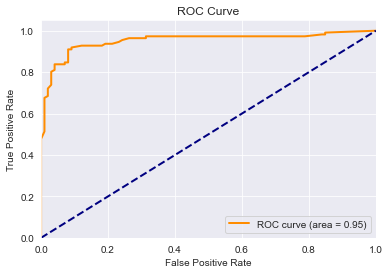

In [136]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print_score(rf, x_train, x_test, y_train, y_test, train=True)
print_score(rf, x_train, x_test, y_train, y_test, train=False)

<h2 align = 'center'><font color = "blue">Checking for KNeighborsClassifier algorithm..</font></h2>

In [138]:
knn = KNeighborsClassifier()
train = []
test = []
diff = []
randomstate = []
for i in range(0, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = i)
    knn.fit(x_train, y_train)
    pred_train = knn.predict(x_train)
    pred_test = knn.predict(x_test)
    
    if (round(accuracy_score(y_train, pred_train),1)>round(accuracy_score(y_test, pred_test),1)*1.02) | (round(accuracy_score(y_train, pred_train),1)<round(accuracy_score(y_test, pred_test),1)*0.98):
        train.append(accuracy_score(y_train, pred_train))
        test.append(accuracy_score(y_test, pred_test))
        diff.append(accuracy_score(y_train, pred_train) - accuracy_score(y_test, pred_test))
        randomstate.append(i)
    
table = pd.DataFrame(list(zip(randomstate, train, test, diff)),
                              columns =['randomstate', 'train_score', 'test_score', 'score_diff'],
                              index=pd.RangeIndex(start=1, stop=(len(randomstate)+1), name='Sr. No.'))

# table.sort_values(by=['score_diff', 'train_score', 'test_score']).head(10)

In [139]:
table[(-0.01 < table['score_diff']) & (table['score_diff'] < 0.01)].sort_values(by=['score_diff', 'train_score', 'test_score'])

,randomstate,train_score,test_score,score_diff
Sr. No.,,,,
747,776,0.844498,0.852381,-0.007883
67,66,0.848086,0.852381,-0.004295
271,278,0.848086,0.852381,-0.004295
445,461,0.848086,0.852381,-0.004295
419,435,0.850478,0.847619,0.002859
579,600,0.850478,0.847619,0.002859
647,670,0.851675,0.847619,0.004056
783,814,0.851675,0.847619,0.004056
415,430,0.852871,0.847619,0.005252


## Splitting the datframe..

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 435)

## Training & evaluating model..

accuracy score for train : 85.05%
accuracy score for test : 84.76
Confusion Matrix :

[[87 15]
 [17 91]]



 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       102
           1       0.86      0.84      0.85       108

    accuracy                           0.85       210
   macro avg       0.85      0.85      0.85       210
weighted avg       0.85      0.85      0.85       210

Cross Validation score at best cv=8 is : 80.50%


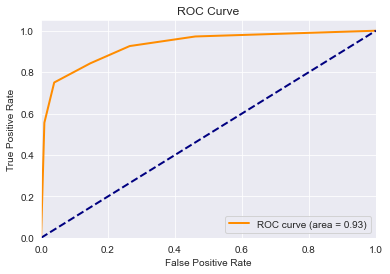

In [141]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print_score(knn, x_train, x_test, y_train, y_test, train=True)
print_score(knn, x_train, x_test, y_train, y_test, train=False)

<h2 align = 'center'><font color = "blue">Checking for GradientBoostingClassifier algorithm..</font></h2>

In [142]:
gb = GradientBoostingClassifier()
train = []
test = []
diff = []
randomstate = []
for i in range(0, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = i)
    gb.fit(x_train, y_train)
    pred_train = gb.predict(x_train)
    pred_test = gb.predict(x_test)
    
    if (round(accuracy_score(y_train, pred_train),1)>round(accuracy_score(y_test, pred_test),1)*1.02) | (round(accuracy_score(y_train, pred_train),1)<round(accuracy_score(y_test, pred_test),1)*0.98):
        train.append(accuracy_score(y_train, pred_train))
        test.append(accuracy_score(y_test, pred_test))
        diff.append(accuracy_score(y_train, pred_train) - accuracy_score(y_test, pred_test))
        randomstate.append(i)
    
table = pd.DataFrame(list(zip(randomstate, train, test, diff)),
                              columns =['randomstate', 'train_score', 'test_score', 'score_diff'],
                              index=pd.RangeIndex(start=1, stop=(len(randomstate)+1), name='Sr. No.'))

# table.sort_values(by=['score_diff', 'train_score', 'test_score']).head(10)

In [150]:
table[(-0.035 < table['score_diff']) & (table['score_diff'] < 0.035)].sort_values(by=['score_diff', 'train_score', 'test_score'])

,randomstate,train_score,test_score,score_diff
Sr. No.,,,,
158,185,0.877990,0.847619,0.030371
595,717,0.877990,0.847619,0.030371
148,173,0.879187,0.847619,0.031568
319,378,0.879187,0.847619,0.031568


## Splitting the datframe..

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 185)

## Training & evaluating model..

accuracy score for train : 87.80%
accuracy score for test : 84.76
Confusion Matrix :

[[97 20]
 [12 81]]



 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       117
           1       0.80      0.87      0.84        93

    accuracy                           0.85       210
   macro avg       0.85      0.85      0.85       210
weighted avg       0.85      0.85      0.85       210

Cross Validation score at best cv=4 is : 82.89%


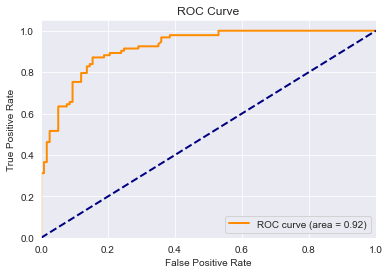

In [152]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
print_score(gb, x_train, x_test, y_train, y_test, train=True)
print_score(gb, x_train, x_test, y_train, y_test, train=False)

<h2 align = 'center'><font color = "blue">Checking for Support Vector Machine Classifier algorithm..</font></h2>

In [153]:
svc = SVC()
train = []
test = []
diff = []
randomstate = []
for i in range(0, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = i)
    svc.fit(x_train, y_train)
    pred_train = svc.predict(x_train)
    pred_test = svc.predict(x_test)
    
    if (round(accuracy_score(y_train, pred_train),1)>round(accuracy_score(y_test, pred_test),1)*1.025) | (round(accuracy_score(y_train, pred_train),1)<round(accuracy_score(y_test, pred_test),1)*0.975):
        train.append(accuracy_score(y_train, pred_train))
        test.append(accuracy_score(y_test, pred_test))
        diff.append(accuracy_score(y_train, pred_train) - accuracy_score(y_test, pred_test))
        randomstate.append(i)
    
table = pd.DataFrame(list(zip(randomstate, train, test, diff)),
                              columns =['randomstate', 'train_score', 'test_score', 'score_diff'],
                              index=pd.RangeIndex(start=1, stop=(len(randomstate)+1), name='Sr. No.'))

# table.sort_values(by=['score_diff', 'train_score', 'test_score']).head(10)

In [157]:
table[(-0.003 < table['score_diff']) & (table['score_diff'] < 0.003)].sort_values(by=['score_diff', 'train_score', 'test_score'])

,randomstate,train_score,test_score,score_diff
Sr. No.,,,,
40,49,0.850478,0.847619,0.002859
74,95,0.850478,0.847619,0.002859
93,124,0.850478,0.847619,0.002859


## Splitting the datframe..

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 49)

## Training & evaluating model..

accuracy score for train : 85.05%
accuracy score for test : 84.76
Confusion Matrix :

[[89 16]
 [16 89]]



 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.85      0.85      0.85       105

    accuracy                           0.85       210
   macro avg       0.85      0.85      0.85       210
weighted avg       0.85      0.85      0.85       210

Cross Validation score at best cv=9 is : 84.13%


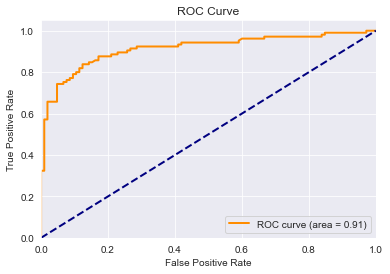

In [159]:
svc = SVC(probability=True)
svc.fit(x_train, y_train)
print_score(svc, x_train, x_test, y_train, y_test, train=True)
print_score(svc, x_train, x_test, y_train, y_test, train=False)

# Conclusion after initial model checking:

## Out of LogisticRegression, RandomForestClassifier, GradientBoostingClassifier, DecisionTreeClassifier, KNeighborsClassifier & SVC, 

## Only LogisticRegression & SVC has similar training & testing accuracies,
## but SVC has better area under curve & high cross_val_score than logistic regression.

## the Cross validation score(84.13%) is also very close to testing set(84.76%) as well as training set(85.05%) score.

## It has better area(91%) under the ROC curve than logistic regression area(90%). So we are going forward with SVC model.

<h1 align="center"><font color = "red">Hyperparameter tuning using GridSearchCV</font> </h1>

In [160]:
# param_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#               'C' : np.logspace(-4, 4, 20),
#               'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
#               'max_iter' : [100, 200,300,400,500]
#              }

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [161]:
grd = GridSearchCV(svc, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [162]:
best_clf = grd.fit(x_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.2min finished


In [163]:
best_clf.best_estimator_

SVC(C=10, gamma=0.01, probability=True)

In [164]:
best_clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [165]:
grd_pred = best_clf.best_estimator_.predict(x_test)
accuracy_score(y_test, grd_pred)

0.8428571428571429

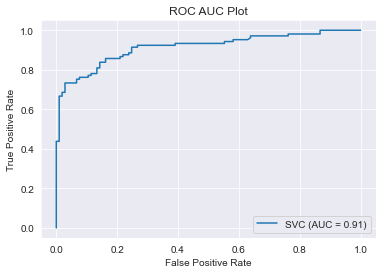

In [166]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(best_clf.best_estimator_, x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

In [170]:
svc = SVC(C= 10, gamma= 0.01, kernel ='rbf', probability=True)

accuracy score for train : 82.89%
accuracy score for test : 84.29
Confusion Matrix :

[[90 15]
 [18 87]]



 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.85      0.83      0.84       105

    accuracy                           0.84       210
   macro avg       0.84      0.84      0.84       210
weighted avg       0.84      0.84      0.84       210

Cross Validation score at best cv=10 is : 83.29%


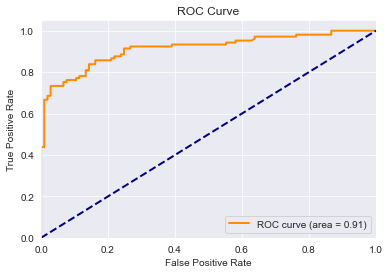

In [171]:
svc.fit(x_train, y_train)
print_score(svc, x_train, x_test, y_train, y_test, train=True)
print_score(svc, x_train, x_test, y_train, y_test, train=False)

## After Hyperparameter tuning Acuracy for train & test & as well as Cross_val_score reduced.

<h1 align="center"><font color = "red">Model Saving</font> </h1>

In [172]:
filename='titanic.pkl'
pickle.dump(svc,open(filename,'wb'))

In [173]:
log =pickle.load(open('titanic.pkl','rb'))
score=log.score(x_test,y_test)
print(score*100)

84.28571428571429
